<a href="https://colab.research.google.com/github/jyotidabass/Predict_insurance_price/blob/main/Predict_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/adityaagrawal87/Medical-Insurance-Prediction.git

Cloning into 'Medical-Insurance-Prediction'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10
Unpacking objects: 100% (10/10), done.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('/content/Medical-Insurance-Prediction/insurance.csv')

In [4]:
# Look at the sample data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Look for the missing values in the columns
df.isna().sum()
# We found no missing values in the dataset

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Check for the data types
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

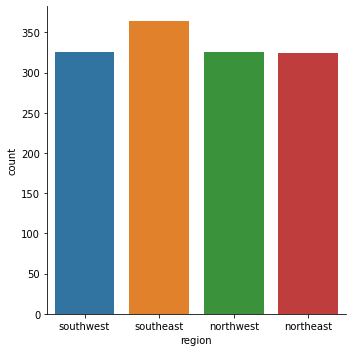

In [7]:
# Checking if an perticular region is dominating the dataset. Its not the case here
sns.catplot(x='region', kind="count", data= df);

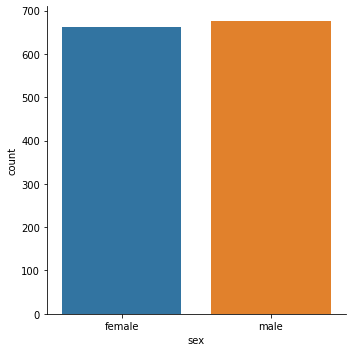

In [8]:
# Checking the same for gender as well. The count is almost the same
sns.catplot(x='sex', kind="count", data= df);

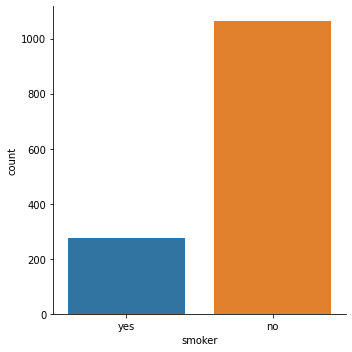

In [9]:
# Checking the same for smoker as well. The count of non smokers are more in the dataset
sns.catplot(x='smoker', kind="count", data= df);

In [10]:
# Checking if there is relationship beteen the mean insurance of smokers and non smokers
mean_smo, mean_non_smo = df['charges'][df['smoker'] == 'yes'].mean(), df['charges'][df['smoker'] == 'no'].mean()
mean_smo, mean_non_smo

(32050.23183153285, 8434.268297856199)

In [11]:
# Lets check for gender as well
mean_male, mean_female = df['charges'][df['sex'] == 'male'].mean(), df['charges'][df['sex'] == 'female'].mean()
mean_male, mean_female

(13956.751177721886, 12569.57884383534)

In [12]:
# Check for BMI higher than the normal range - Assumed normal range as 18.5 to 25
mean_bmi_large, mean_bmi_normal = df['charges'][df['bmi'] > 25].mean(), df['charges'][df['bmi'] <= 25].mean()
mean_bmi_large, mean_bmi_normal

(13946.47603532447, 10284.29002518219)

In [13]:
# One more analysis with age 
# Check for BMI higher than the normal range - Assumed normal range as 18.5 to 25
mean_young, mean_old = df['charges'][df['age'] < 35].mean(), df['charges'][df['age'] >= 35].mean()
mean_young, mean_old

(9673.31690839526, 15773.351087515846)

In [14]:
mean_no_child, mean_child = df['charges'][df['children'] == 0].mean(), df['charges'][df['children'] > 0].mean()
mean_no_child, mean_child

(12365.975601635882, 13949.94109348167)

# Feature Selection

In [15]:
# Lets lookk at our data set once again
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
# Lets dummy code the categorical variables. Dropping coulmns region and children as they hardly contribute to insurance charges
df = df.drop(['children','region'], axis = 1)


In [40]:
cat_var = ['sex','smoker']
df['sex'] = pd.get_dummies(df['sex'], drop_first=True)
df['smoker'] = pd.get_dummies(df['smoker'], drop_first=True)
df

,age,sex,bmi,smoker,charges,High_Risk,Medium_Risk
0,19,0,27.900,1,16884.92400,0,0
1,18,1,33.770,0,1725.55230,0,0
2,28,1,33.000,0,4449.46200,0,0
3,33,1,22.705,0,21984.47061,0,0
4,32,1,28.880,0,3866.85520,0,0
...,...,...,...,...,...,...,...
1333,50,1,30.970,0,10600.54830,0,0
1334,18,0,31.920,0,2205.98080,0,0
1335,18,0,36.850,0,1629.83350,0,0
1336,21,0,25.800,0,2007.94500,0,0


In [41]:
def coladd (age,smoker,bmi):
    if age>35 and smoker ==1 and bmi >25:
        return 1
    else:
        return 0

df['High_Risk'] = df[['age','smoker','bmi']].apply(lambda x: coladd(*x), axis=1)

In [42]:
df['High_Risk'].value_counts()

0    1214
1     124
Name: High_Risk, dtype: int64

In [43]:
# Lets see if the mean insurance amount of these individuals are the ver high compared to rest
mean_high_risk, mean_not_high_risk = df['charges'][df['High_Risk'] == 1].mean(), df['charges'][df['High_Risk'] == 0].mean()
mean_high_risk, mean_not_high_risk

(38228.258617983876, 10721.186921028826)

In [44]:
# Lets build one more with ignoring the age and considering onl BMI and smoker
def coladd1 (smoker,bmi):
    if smoker ==1 and bmi >25:
        return 1
    else:
        return 0

df['Medium_Risk'] = df[['smoker','bmi']].apply(lambda x: coladd1(*x), axis=1)

In [45]:
# Checking the same analsis for medium risk individuals
mean_med_risk, mean_not_med_risk = df['charges'][df['Medium_Risk'] == 1].mean(), df['charges'][df['Medium_Risk'] == 0].mean()
mean_med_risk, mean_not_med_risk

(35116.90965694065, 8994.836260848077)

# Model Building

In [46]:
df.columns

Index(['age', 'sex', 'bmi', 'smoker', 'charges', 'High_Risk', 'Medium_Risk'], dtype='object')

In [47]:
X = df[['age', 'sex', 'bmi', 'smoker','High_Risk', 'Medium_Risk']]
Y = df['charges']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 100)

In [49]:
from sklearn import linear_model

In [50]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
result = regr.predict(X_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, result))
print('Variance score: %.2f' % r2_score(y_test, result))


Mean squared error: 27621861.42
Variance score: 0.81


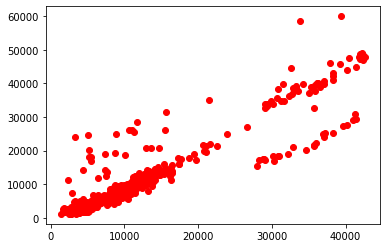

In [51]:
plt.scatter( result, y_test,  color=['red'])

# Using Lasso Regression

In [56]:
from sklearn.linear_model import LassoCV
# Alpha (regularization strength) of LASSO regression
lasso_eps = 0.0001
lasso_nalpha=20
lasso_iter=10000
model_lasso= LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter, normalize=True,cv=5)
model_lasso.fit(X_train,y_train)
#To get the variable importance
print(list(zip(model_lasso.coef_,X_train.columns)))
print(model_lasso.intercept_)

[(259.3718486787609, 'age'), (-238.1320445898881, 'sex'), (165.7160811028398, 'bmi'), (12911.4363277452, 'smoker'), (919.5895964625162, 'High_Risk'), (13068.007307497262, 'Medium_Risk')]
-6610.8491038529955


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


In [57]:
y_predited_lasso = model_lasso.predict(X_test)

Text(0, 0.5, 'Actual Insurance')

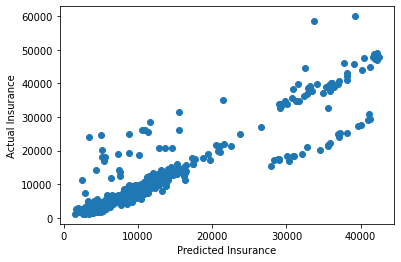

In [58]:
plt.scatter(y_predited_lasso,y_test)
plt.xlabel("Predicted Insurance")
plt.ylabel("Actual Insurance")

In [59]:
print('Variance score: %.2f' % r2_score(y_test, y_predited_lasso))

Variance score: 0.81
